In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing

In [3]:
np.random.seed(7)

In [6]:
dataset = pd.read_csv('apple_share_price.csv', usecols=[1,2,3,4])

In [7]:
dataset.head()


,Open,High,Low,Close
0,156.60,158.57,156.07,157.48
1,159.90,160.00,154.63,155.32
2,159.26,161.27,159.11,161.06
3,158.60,161.83,158.27,160.08
4,157.06,158.92,156.67,158.81


In [8]:
dataset = dataset.reindex(index = dataset.index[::-1])

In [9]:
dataset.head()


,Open,High,Low,Close
1663,46.52,47.18,46.41,47.08
1662,47.49,47.50,46.88,47.33
1661,47.08,47.76,47.07,47.71
1660,47.82,47.89,47.56,47.68
1659,47.71,48.05,47.41,48.02


In [10]:
obs = np.arange(1, len(dataset) + 1, 1)

In [11]:
obs


array([   1,    2,    3, ..., 1662, 1663, 1664])

In [12]:
OHLC_avg = dataset.mean(axis = 1)

In [13]:
OHLC_avg

1663     46.7975
1662     47.3000
1661     47.4050
1660     47.7375
1659     47.7975
          ...   
4       157.8650
3       159.6950
2       160.1750
1       157.4625
0       157.1800
Length: 1664, dtype: float64

In [14]:
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)

In [15]:
HLC_avg

1663     46.890000
1662     47.236667
1661     47.513333
1660     47.710000
1659     47.826667
           ...    
4       158.133333
3       160.060000
2       160.480000
1       156.650000
0       157.373333
Length: 1664, dtype: float64

In [16]:
close_val = dataset[['Close']]


In [17]:
close_val

,Close
1663,47.08
1662,47.33
1661,47.71
1660,47.68
1659,48.02
...,...
4,158.81
3,160.08
2,161.06
1,155.32


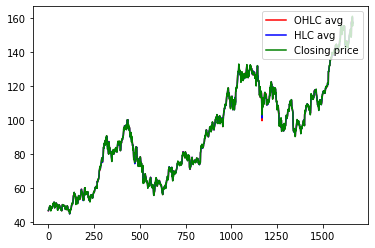

In [18]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [19]:
# PREPARATION OF TIME SERIES DATASE

In [20]:
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664

In [21]:
OHLC_avg

array([[ 46.7975],
       [ 47.3   ],
       [ 47.405 ],
       ...,
       [160.175 ],
       [157.4625],
       [157.18  ]])

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [23]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [25]:
OHLC_avg

array([[0.01530745],
       [0.0196717 ],
       [0.02058364],
       ...,
       [1.        ],
       [0.97644172],
       [0.97398819]])

In [26]:
# TRAIN-TEST SPLIT

In [27]:
train_OHLC = int(len(OHLC_avg) * 0.75)

In [28]:
train_OHLC

1248

In [29]:
test_OHLC = len(OHLC_avg) - train_OHLC

In [30]:
test_OHLC

416

In [31]:
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [32]:
train_OHLC

array([[0.01530745],
       [0.0196717 ],
       [0.02058364],
       ...,
       [0.57970731],
       [0.57634184],
       [0.57117422]])

In [33]:
test_OHLC

array([[0.56906809],
       [0.5430997 ],
       [0.53719385],
       [0.53990794],
       [0.54670401],
       [0.55115512],
       [0.53877888],
       [0.54683429],
       [0.54637832],
       [0.5297464 ],
       [0.51066093],
       [0.513679  ],
       [0.48497481],
       [0.45933212],
       [0.45865902],
       [0.46413062],
       [0.47746222],
       [0.46912454],
       [0.46369637],
       [0.4478461 ],
       [0.45396908],
       [0.44154942],
       [0.44736842],
       [0.47711482],
       [0.48106653],
       [0.47492183],
       [0.43271235],
       [0.42263766],
       [0.44224422],
       [0.44482804],
       [0.43442765],
       [0.43887876],
       [0.4447629 ],
       [0.43644693],
       [0.42717561],
       [0.43210439],
       [0.43533959],
       [0.42265937],
       [0.4245918 ],
       [0.44072434],
       [0.45381709],
       [0.45583637],
       [0.44393781],
       [0.44699931],
       [0.43859649],
       [0.43347229],
       [0.44441549],
       [0.452

In [35]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)

In [36]:
trainX, trainY = preprocessing.new_dataset(train_OHLC, 1)

In [38]:
trainX


array([[0.01530745],
       [0.0196717 ],
       [0.02058364],
       ...,
       [0.61776967],
       [0.60029095],
       [0.57970731]])

In [39]:
trainY

array([0.0196717 , 0.02058364, 0.02347143, ..., 0.60029095, 0.57970731,
       0.57634184])

In [40]:
testX, testY = preprocessing.new_dataset(test_OHLC, 1)

In [41]:
testX

array([[0.56906809],
       [0.5430997 ],
       [0.53719385],
       [0.53990794],
       [0.54670401],
       [0.55115512],
       [0.53877888],
       [0.54683429],
       [0.54637832],
       [0.5297464 ],
       [0.51066093],
       [0.513679  ],
       [0.48497481],
       [0.45933212],
       [0.45865902],
       [0.46413062],
       [0.47746222],
       [0.46912454],
       [0.46369637],
       [0.4478461 ],
       [0.45396908],
       [0.44154942],
       [0.44736842],
       [0.47711482],
       [0.48106653],
       [0.47492183],
       [0.43271235],
       [0.42263766],
       [0.44224422],
       [0.44482804],
       [0.43442765],
       [0.43887876],
       [0.4447629 ],
       [0.43644693],
       [0.42717561],
       [0.43210439],
       [0.43533959],
       [0.42265937],
       [0.4245918 ],
       [0.44072434],
       [0.45381709],
       [0.45583637],
       [0.44393781],
       [0.44699931],
       [0.43859649],
       [0.43347229],
       [0.44441549],
       [0.452

In [42]:
testY

array([0.5430997 , 0.53719385, 0.53990794, 0.54670401, 0.55115512,
       0.53877888, 0.54683429, 0.54637832, 0.5297464 , 0.51066093,
       0.513679  , 0.48497481, 0.45933212, 0.45865902, 0.46413062,
       0.47746222, 0.46912454, 0.46369637, 0.4478461 , 0.45396908,
       0.44154942, 0.44736842, 0.47711482, 0.48106653, 0.47492183,
       0.43271235, 0.42263766, 0.44224422, 0.44482804, 0.43442765,
       0.43887876, 0.4447629 , 0.43644693, 0.42717561, 0.43210439,
       0.43533959, 0.42265937, 0.4245918 , 0.44072434, 0.45381709,
       0.45583637, 0.44393781, 0.44699931, 0.43859649, 0.43347229,
       0.44441549, 0.45286173, 0.45225378, 0.46949366, 0.48126194,
       0.48658155, 0.5001737 , 0.49485409, 0.48599531, 0.4866684 ,
       0.48816658, 0.49535348, 0.49717735, 0.51552458, 0.52401424,
       0.52677176, 0.52937728, 0.53085374, 0.53050634, 0.53291645,
       0.52575126, 0.52609866, 0.53217822, 0.55821174, 0.55877627,
       0.55764721, 0.57291124, 0.56307539, 0.5672008 , 0.55777

In [43]:
# RESHAPING TRAIN AND TEST DATA

In [44]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [45]:
trainX

array([[[0.01530745]],

       [[0.0196717 ]],

       [[0.02058364]],

       ...,

       [[0.61776967]],

       [[0.60029095]],

       [[0.57970731]]])

In [46]:
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [47]:
testX

array([[[0.56906809]],

       [[0.5430997 ]],

       [[0.53719385]],

       [[0.53990794]],

       [[0.54670401]],

       [[0.55115512]],

       [[0.53877888]],

       [[0.54683429]],

       [[0.54637832]],

       [[0.5297464 ]],

       [[0.51066093]],

       [[0.513679  ]],

       [[0.48497481]],

       [[0.45933212]],

       [[0.45865902]],

       [[0.46413062]],

       [[0.47746222]],

       [[0.46912454]],

       [[0.46369637]],

       [[0.4478461 ]],

       [[0.45396908]],

       [[0.44154942]],

       [[0.44736842]],

       [[0.47711482]],

       [[0.48106653]],

       [[0.47492183]],

       [[0.43271235]],

       [[0.42263766]],

       [[0.44224422]],

       [[0.44482804]],

       [[0.43442765]],

       [[0.43887876]],

       [[0.4447629 ]],

       [[0.43644693]],

       [[0.42717561]],

       [[0.43210439]],

       [[0.43533959]],

       [[0.42265937]],

       [[0.4245918 ]],

       [[0.44072434]],

       [[0.45381709]],

       [[0.45583

In [48]:
# LSTM MODEL

In [50]:
step_size = 1
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [51]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)


Epoch 1/5
 - 5s - loss: 0.0042
Epoch 2/5
 - 4s - loss: 3.7515e-04
Epoch 3/5
 - 3s - loss: 3.1348e-04
Epoch 4/5
 - 4s - loss: 2.6510e-04
Epoch 5/5
 - 4s - loss: 2.3218e-04


In [52]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [55]:
trainPredict

array([[0.04135766],
       [0.04492023],
       [0.04566613],
       ...,
       [0.62965125],
       [0.61040413],
       [0.5878533 ]], dtype=float32)

In [56]:
testPredict

array([[0.57624835],
       [0.5480763 ],
       [0.5417006 ],
       [0.54462916],
       [0.5519731 ],
       [0.5567915 ],
       [0.5434106 ],
       [0.552114  ],
       [0.5516208 ],
       [0.53367794],
       [0.51320744],
       [0.5164358 ],
       [0.48586732],
       [0.4588255 ],
       [0.45811924],
       [0.46386614],
       [0.4779182 ],
       [0.46912172],
       [0.46340957],
       [0.44679773],
       [0.45320287],
       [0.440227  ],
       [0.44629866],
       [0.4775512 ],
       [0.48172924],
       [0.4752351 ],
       [0.431033  ],
       [0.42059144],
       [0.4409512 ],
       [0.44364625],
       [0.432815  ],
       [0.437445  ],
       [0.44357827],
       [0.43491435],
       [0.42528924],
       [0.43040165],
       [0.43376282],
       [0.42061386],
       [0.42261332],
       [0.4393672 ],
       [0.45304373],
       [0.45515922],
       [0.44271743],
       [0.4459132 ],
       [0.43715113],
       [0.4318223 ],
       [0.44321576],
       [0.452

In [53]:
# DE-NORMALIZING FOR PLOTTING

In [57]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [58]:
trainPredict

array([[ 49.79692 ],
       [ 50.207115],
       [ 50.293   ],
       ...,
       [117.53304 ],
       [115.31694 ],
       [112.72043 ]], dtype=float32)

In [60]:
trainY

array([[ 47.3   ,  47.405 ,  47.7375, ..., 114.1525, 111.7825, 111.395 ]])

In [61]:
testPredict

array([[111.38423 ],
       [108.1405  ],
       [107.40641 ],
       [107.7436  ],
       [108.58918 ],
       [109.143974],
       [107.603294],
       [108.60541 ],
       [108.548615],
       [106.48267 ],
       [104.1257  ],
       [104.49742 ],
       [100.97776 ],
       [ 97.864174],
       [ 97.78285 ],
       [ 98.44455 ],
       [100.0625  ],
       [ 99.049675],
       [ 98.39198 ],
       [ 96.479294],
       [ 97.21678 ],
       [ 95.72274 ],
       [ 96.42183 ],
       [100.02025 ],
       [100.501305],
       [ 99.75357 ],
       [ 94.66414 ],
       [ 93.4619  ],
       [ 95.80612 ],
       [ 96.11643 ],
       [ 94.86932 ],
       [ 95.40242 ],
       [ 96.108604],
       [ 95.11104 ],
       [ 94.00281 ],
       [ 94.591446],
       [ 94.978455],
       [ 93.464485],
       [ 93.694695],
       [ 95.62374 ],
       [ 97.198456],
       [ 97.44203 ],
       [ 96.00948 ],
       [ 96.37745 ],
       [ 95.36858 ],
       [ 94.75502 ],
       [ 96.066864],
       [ 97.0

In [62]:
testY

array([[107.5675, 106.8875, 107.2   , 107.9825, 108.495 , 107.07  ,
        107.9975, 107.945 , 106.03  , 103.8325, 104.18  , 100.875 ,
         97.9225,  97.845 ,  98.475 , 100.01  ,  99.05  ,  98.425 ,
         96.6   ,  97.305 ,  95.875 ,  96.545 ,  99.97  , 100.425 ,
         99.7175,  94.8575,  93.6975,  95.955 ,  96.2525,  95.055 ,
         95.5675,  96.245 ,  95.2875,  94.22  ,  94.7875,  95.16  ,
         93.7   ,  93.9225,  95.78  ,  97.2875,  97.52  ,  96.15  ,
         96.5025,  95.535 ,  94.945 ,  96.205 ,  97.1775,  97.1075,
         99.0925, 100.4475, 101.06  , 102.625 , 102.0125, 100.9925,
        101.07  , 101.2425, 102.07  , 102.28  , 104.3925, 105.37  ,
        105.6875, 105.9875, 106.1575, 106.1175, 106.395 , 105.57  ,
        105.61  , 106.31  , 109.3075, 109.3725, 109.2425, 111.    ,
        109.8675, 110.3425, 109.2575, 108.8775, 109.3575, 109.735 ,
        111.495 , 111.86  , 110.9975, 108.065 , 107.255 , 106.98  ,
        106.3375, 105.4475, 105.06  , 104.3675, 

In [64]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))


Train RMSE: 1.86


In [65]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))


Test RMSE: 3.23


In [66]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [67]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

In [68]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

In [69]:
OHLC_avg

array([[ 46.7975],
       [ 47.3   ],
       [ 47.405 ],
       ...,
       [160.175 ],
       [157.4625],
       [157.18  ]])

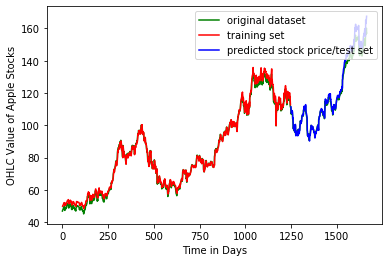

In [70]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()

In [72]:
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", np.asscalar(last_val))
print("Next Day Value:", np.asscalar(last_val*next_val))

Last Day Value: 167.5853271484375
Next Day Value: 178.37098693847656


/home/test/anaconda3/envs/astrophysics123/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/home/test/anaconda3/envs/astrophysics123/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """
